In [1]:
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import math

In [3]:
#df = pd.read_csv('matrix_real1.bench',sep=" ")
df = pd.read_csv('generatedData_bench_100iter.csv')
cols = []
for i in range(1,25):
    cols.append('val_{}'.format(i))
df['minTime'] =df[cols].min(axis=1)
df['maxTime']=df[cols].max(axis=1)
df

,Column1,DataFile,method,metric,mean,sd,val_1,val_2,val_3,val_4,...,val_93,val_94,val_95,val_96,val_97,val_98,val_99,val_100,minTime,maxTime
0,0,../DistanceBenchmarking/Generated/100_cells_10...,amap,euclidean,2.158145e+06,8.162644e+04,2.085170e+06,2.132396e+06,2.296944e+06,2.088194e+06,...,2.163736e+06,2.170371e+06,2.199780e+06,2.248152e+06,2.186941e+06,2.121450e+06,2.187356e+06,2.194938e+06,2.049968e+06,2.296944e+06
1,1,../DistanceBenchmarking/Generated/100_cells_10...,amap,pearson,2.671846e+06,1.222369e+05,2.632823e+06,2.381265e+06,2.944571e+06,2.667706e+06,...,2.769618e+06,2.610814e+06,2.596038e+06,2.814867e+06,2.610909e+06,2.645032e+06,2.747577e+06,2.630012e+06,2.361366e+06,3.018894e+06
2,2,../DistanceBenchmarking/Generated/100_cells_10...,amap,kendall,1.112856e+08,7.693236e+06,1.149370e+08,1.163666e+08,1.173964e+08,1.188970e+08,...,1.025721e+08,1.086875e+08,1.079660e+08,1.023612e+08,1.045042e+08,1.049713e+08,1.018269e+08,1.031053e+08,1.102887e+08,1.195488e+08
3,3,../DistanceBenchmarking/Generated/100_cells_10...,GPU,euclidean,5.225445e+05,1.141719e+05,1.341176e+06,2.334318e+05,2.941690e+05,5.634625e+05,...,5.339282e+05,5.293585e+05,5.320940e+05,5.284368e+05,5.327365e+05,5.437258e+05,5.321225e+05,5.309695e+05,1.484395e+05,1.341176e+06
4,4,../DistanceBenchmarking/Generated/100_cells_10...,GPU,pearson,6.541106e+05,1.741764e+05,2.170022e+06,3.595390e+05,3.204490e+05,7.300850e+05,...,6.512450e+05,6.541130e+05,6.570248e+05,6.529005e+05,6.548388e+05,6.501120e+05,6.492565e+05,6.506272e+05,2.720205e+05,2.170022e+06
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
94,92,../DistanceBenchmarking/Generated/10000_cells_...,CPU,kendall,1.059545e+07,1.728989e+05,1.106329e+07,1.088175e+07,1.089263e+07,1.079548e+07,...,9.159115e+06,9.141161e+06,9.123207e+06,9.105253e+06,9.087298e+06,9.069344e+06,9.051390e+06,9.033436e+06,1.045950e+07,1.106329e+07
95,95,../DistanceBenchmarking/Generated/1000_cells_1...,CPU,pearson,2.804294e+06,3.182137e+05,3.705428e+06,3.457062e+06,3.040377e+06,2.724546e+06,...,4.834616e+05,4.544512e+05,4.254408e+05,3.964304e+05,3.674200e+05,3.384096e+05,3.093992e+05,2.803888e+05,2.428300e+06,3.705428e+06
96,96,../DistanceBenchmarking/Generated/10000_cells_...,CPU,euclidean,1.533782e+07,4.458672e+04,1.545025e+07,1.533060e+07,1.533131e+07,1.530843e+07,...,1.516165e+07,1.515945e+07,1.515725e+07,1.515504e+07,1.515284e+07,1.515064e+07,1.514844e+07,1.514623e+07,1.523798e+07,1.545025e+07
97,98,../DistanceBenchmarking/Generated/10000_cells_...,CPU,kendall,1.214166e+09,3.481358e+07,1.210383e+09,1.381135e+09,1.207936e+09,1.207425e+09,...,1.095143e+09,1.093655e+09,1.092167e+09,1.090680e+09,1.089192e+09,1.087704e+09,1.086216e+09,1.084728e+09,1.205186e+09,1.381135e+09


In [4]:
weight=[]
unID=[]
w1=[]
w2=[]
# This is for Matrix.bench file Real Dataset
# for i in df['DataFile']:
#     k= i.split('/')[-1].rsplit('_',1)[0]
#     i = i.split("_")
#     i=i[-1].split(".")[0]
#     weight.append(int(i))
#     unID.append(k)

#This is for Generated dataset
for i in df['DataFile']:
    k=i.split('/')[-1].split('_')
    i= i.split("_")
    w1.append(int(k[0]))
    w2.append(int(k[2]))

df['wX'] = w1
df['wY'] = w2
df['logWX'] = np.log10(df['wX'])
df['logWY'] = np.log10(df['wY'])
# df['weight'] = weight
# #df['minTime'] = df[['val_1':'val_25']].min(axis=1)
# df['logW'] = np.log10(df['weight'])
df['logMeanTime'] = np.log10(df['mean'])
df['logMinTime']=np.log10(df['minTime'])
df['logMaxTime']=np.log10(df['maxTime'])
df['|W|'] = df['wX']*df['wY']
df['Method'] = df['metric']+'_'+df['method']
#df['IDtag'] = unID
#print(df[df['DataFile']])
df

,Column1,DataFile,method,metric,mean,sd,val_1,val_2,val_3,val_4,...,maxTime,wX,wY,logWX,logWY,logMeanTime,logMinTime,logMaxTime,|W|,Method
0,0,../DistanceBenchmarking/Generated/100_cells_10...,amap,euclidean,2.158145e+06,8.162644e+04,2.085170e+06,2.132396e+06,2.296944e+06,2.088194e+06,...,2.296944e+06,100,100000,2.0,5.0,6.334081,6.311747,6.361150,10000000,euclidean_amap
1,1,../DistanceBenchmarking/Generated/100_cells_10...,amap,pearson,2.671846e+06,1.222369e+05,2.632823e+06,2.381265e+06,2.944571e+06,2.667706e+06,...,3.018894e+06,100,100000,2.0,5.0,6.426811,6.373163,6.479848,10000000,pearson_amap
2,2,../DistanceBenchmarking/Generated/100_cells_10...,amap,kendall,1.112856e+08,7.693236e+06,1.149370e+08,1.163666e+08,1.173964e+08,1.188970e+08,...,1.195488e+08,100,100000,2.0,5.0,8.046439,8.042531,8.077545,10000000,kendall_amap
3,3,../DistanceBenchmarking/Generated/100_cells_10...,GPU,euclidean,5.225445e+05,1.141719e+05,1.341176e+06,2.334318e+05,2.941690e+05,5.634625e+05,...,1.341176e+06,100,100000,2.0,5.0,5.718123,5.171549,6.127486,10000000,euclidean_GPU
4,4,../DistanceBenchmarking/Generated/100_cells_10...,GPU,pearson,6.541106e+05,1.741764e+05,2.170022e+06,3.595390e+05,3.204490e+05,7.300850e+05,...,2.170022e+06,100,100000,2.0,5.0,5.815651,5.434602,6.336464,10000000,pearson_GPU
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
94,92,../DistanceBenchmarking/Generated/10000_cells_...,CPU,kendall,1.059545e+07,1.728989e+05,1.106329e+07,1.088175e+07,1.089263e+07,1.079548e+07,...,1.106329e+07,10000,10,4.0,1.0,7.025120,7.019511,7.043884,100000,kendall_CPU
95,95,../DistanceBenchmarking/Generated/1000_cells_1...,CPU,pearson,2.804294e+06,3.182137e+05,3.705428e+06,3.457062e+06,3.040377e+06,2.724546e+06,...,3.705428e+06,1000,1000,3.0,3.0,6.447823,6.385302,6.568838,1000000,pearson_CPU
96,96,../DistanceBenchmarking/Generated/10000_cells_...,CPU,euclidean,1.533782e+07,4.458672e+04,1.545025e+07,1.533060e+07,1.533131e+07,1.530843e+07,...,1.545025e+07,10000,100,4.0,2.0,7.185764,7.182927,7.188935,1000000,euclidean_CPU
97,98,../DistanceBenchmarking/Generated/10000_cells_...,CPU,kendall,1.214166e+09,3.481358e+07,1.210383e+09,1.381135e+09,1.207936e+09,1.207425e+09,...,1.381135e+09,10000,100,4.0,2.0,9.084278,9.081054,9.140236,1000000,kendall_CPU


In [5]:
for i in df['DataFile']:
    k=i.split('/')[-1].split('_')
    i= i.split("_")
    print(i,k)
ma=[]
for i in df['DataFile']:
    m=i.split('/')[-1].split('.')
    ma.append(m[0])
c=0
# for j in df['method']:
#     ma[c]= ma[c]+'_'+j
#     c+=1
# c=0
# for k in df['metric']:
#     ma[c]= ma[c]+'_'+k
#     c+=1

#df['W']=ma
df

['../DistanceBenchmarking/Generated/100', 'cells', '100000', 'genes.csv'] ['100', 'cells', '100000', 'genes.csv']
['../DistanceBenchmarking/Generated/100', 'cells', '100000', 'genes.csv'] ['100', 'cells', '100000', 'genes.csv']
['../DistanceBenchmarking/Generated/100', 'cells', '100000', 'genes.csv'] ['100', 'cells', '100000', 'genes.csv']
['../DistanceBenchmarking/Generated/100', 'cells', '100000', 'genes.csv'] ['100', 'cells', '100000', 'genes.csv']
['../DistanceBenchmarking/Generated/100', 'cells', '100000', 'genes.csv'] ['100', 'cells', '100000', 'genes.csv']
['../DistanceBenchmarking/Generated/100', 'cells', '100000', 'genes.csv'] ['100', 'cells', '100000', 'genes.csv']
['../DistanceBenchmarking/Generated/100', 'cells', '10000', 'genes.csv'] ['100', 'cells', '10000', 'genes.csv']
['../DistanceBenchmarking/Generated/100', 'cells', '10000', 'genes.csv'] ['100', 'cells', '10000', 'genes.csv']
['../DistanceBenchmarking/Generated/100', 'cells', '10000', 'genes.csv'] ['100', 'cells', '1

,Column1,DataFile,method,metric,mean,sd,val_1,val_2,val_3,val_4,...,maxTime,wX,wY,logWX,logWY,logMeanTime,logMinTime,logMaxTime,|W|,Method
0,0,../DistanceBenchmarking/Generated/100_cells_10...,amap,euclidean,2.158145e+06,8.162644e+04,2.085170e+06,2.132396e+06,2.296944e+06,2.088194e+06,...,2.296944e+06,100,100000,2.0,5.0,6.334081,6.311747,6.361150,10000000,euclidean_amap
1,1,../DistanceBenchmarking/Generated/100_cells_10...,amap,pearson,2.671846e+06,1.222369e+05,2.632823e+06,2.381265e+06,2.944571e+06,2.667706e+06,...,3.018894e+06,100,100000,2.0,5.0,6.426811,6.373163,6.479848,10000000,pearson_amap
2,2,../DistanceBenchmarking/Generated/100_cells_10...,amap,kendall,1.112856e+08,7.693236e+06,1.149370e+08,1.163666e+08,1.173964e+08,1.188970e+08,...,1.195488e+08,100,100000,2.0,5.0,8.046439,8.042531,8.077545,10000000,kendall_amap
3,3,../DistanceBenchmarking/Generated/100_cells_10...,GPU,euclidean,5.225445e+05,1.141719e+05,1.341176e+06,2.334318e+05,2.941690e+05,5.634625e+05,...,1.341176e+06,100,100000,2.0,5.0,5.718123,5.171549,6.127486,10000000,euclidean_GPU
4,4,../DistanceBenchmarking/Generated/100_cells_10...,GPU,pearson,6.541106e+05,1.741764e+05,2.170022e+06,3.595390e+05,3.204490e+05,7.300850e+05,...,2.170022e+06,100,100000,2.0,5.0,5.815651,5.434602,6.336464,10000000,pearson_GPU
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
94,92,../DistanceBenchmarking/Generated/10000_cells_...,CPU,kendall,1.059545e+07,1.728989e+05,1.106329e+07,1.088175e+07,1.089263e+07,1.079548e+07,...,1.106329e+07,10000,10,4.0,1.0,7.025120,7.019511,7.043884,100000,kendall_CPU
95,95,../DistanceBenchmarking/Generated/1000_cells_1...,CPU,pearson,2.804294e+06,3.182137e+05,3.705428e+06,3.457062e+06,3.040377e+06,2.724546e+06,...,3.705428e+06,1000,1000,3.0,3.0,6.447823,6.385302,6.568838,1000000,pearson_CPU
96,96,../DistanceBenchmarking/Generated/10000_cells_...,CPU,euclidean,1.533782e+07,4.458672e+04,1.545025e+07,1.533060e+07,1.533131e+07,1.530843e+07,...,1.545025e+07,10000,100,4.0,2.0,7.185764,7.182927,7.188935,1000000,euclidean_CPU
97,98,../DistanceBenchmarking/Generated/10000_cells_...,CPU,kendall,1.214166e+09,3.481358e+07,1.210383e+09,1.381135e+09,1.207936e+09,1.207425e+09,...,1.381135e+09,10000,100,4.0,2.0,9.084278,9.081054,9.140236,1000000,kendall_CPU


In [6]:
#Remove anomalies
df.drop(df[df['logWX']==5.0].index,inplace=True)

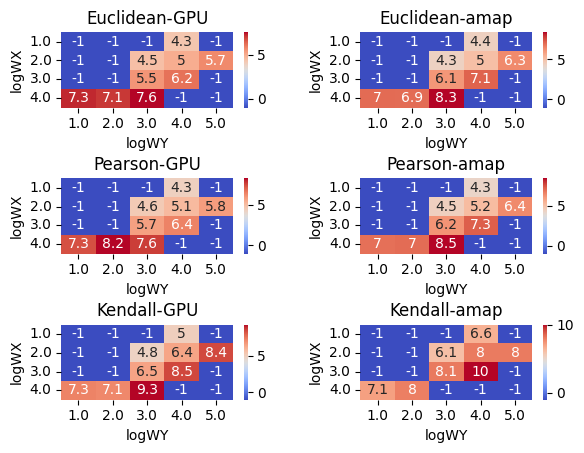

In [32]:
matrix1 = df[df['metric']=="euclidean"]
matrix1 = matrix1[matrix1["method"]=="GPU"].pivot('logWX','logWY','logMeanTime')
matrix1.fillna(-1,inplace=True)

matrix2 = df[df['metric']=="euclidean"]
matrix2 = matrix2[matrix2["method"]=="amap"].pivot('logWX','logWY','logMeanTime')
matrix2.fillna(-1,inplace=True)

matrix3 = df[df['metric']=="pearson"]
matrix3 = matrix3[matrix3["method"]=="GPU"].pivot('logWX','logWY','logMeanTime')
matrix3.fillna(-1,inplace=True)

matrix4 = df[df['metric']=="pearson"]
matrix4 = matrix4[matrix4["method"]=="amap"].pivot('logWX','logWY','logMeanTime')
matrix4.fillna(-1,inplace=True)

matrix5 = df[df['metric']=="kendall"]
matrix5 = matrix5[matrix5["method"]=="GPU"].pivot('logWX','logWY','logMeanTime')
matrix5.fillna(-1,inplace=True)

matrix6 = df[df['metric']=="kendall"]
matrix6 = matrix6[matrix6["method"]=="amap"].pivot('logWX','logWY','logMeanTime')
matrix6.fillna(-1,inplace=True)

matrix7 = df[df['metric']=="kendall"]
matrix7 = matrix7[matrix7["method"]=="CPU"].pivot('logWX','logWY','logMeanTime')
matrix7.fillna(-1,inplace=True)

matrix8 = df[df['metric']=="euclidean"]
matrix8 = matrix8[matrix8["method"]=="CPU"].pivot('logWX','logWY','logMeanTime')
matrix8.fillna(-1,inplace=True)

matrix9 = df[df['metric']=="euclidean"]
matrix9 = matrix9[matrix9["method"]=="factoextra"].pivot('logWX','logWY','logMeanTime')
matrix9.fillna(-1,inplace=True)

matrix10 = df[df['metric']=="pearson"]
matrix10 = matrix10[matrix10["method"]=="CPU"].pivot('logWX','logWY','logMeanTime')
matrix10.fillna(-1,inplace=True)

matrix11 = df[df['metric']=="pearson"]
matrix11 = matrix11[matrix11["method"]=="factoextra"].pivot('logWX','logWY','logMeanTime')
matrix11.fillna(-1,inplace=True)

matrix12 = df[df['metric']=="kendall"]
matrix12 = matrix12[matrix12["method"]=="factoextra"].pivot('logWX','logWY','logMeanTime')
matrix12.fillna(-1,inplace=True)

stdmtx = np.full((4, 5), 11)
 #stdmtx.isnull().astype(int)
#matrix2
#matrix1
fig, axs = plt.subplots(nrows=3,ncols=2)
plt.tight_layout(pad=3.0)
sns.heatmap(matrix1, cmap="coolwarm", annot=True,ax=axs[0][0]).set_title("Euclidean-GPU")
sns.heatmap(matrix2, cmap="coolwarm", annot=True,ax=axs[0][1]).set_title("Euclidean-amap")
sns.heatmap(matrix3, cmap="coolwarm", annot=True,ax=axs[1][0]).set_title("Pearson-GPU")
sns.heatmap(matrix4, cmap="coolwarm", annot=True,ax=axs[1][1]).set_title("Pearson-amap")
sns.heatmap(matrix5, cmap="coolwarm", annot=True,ax=axs[2][0]).set_title("Kendall-GPU")
sns.heatmap(matrix6, cmap="coolwarm", annot=True,ax=axs[2][1]).set_title("Kendall-amap")
plt.savefig('colmat_bench_generated.png',dpi=200)

In [27]:
matrix1.fillna(-1)

logWY,1.0,2.0,3.0,4.0,5.0
logWX,,,,,
1.0,-1.000000,-1.000000,-1.000000,4.290299,-1.000000
2.0,-1.000000,-1.000000,4.508987,4.977272,5.718123
3.0,-1.000000,-1.000000,5.509660,6.151028,-1.000000
4.0,7.271231,7.079642,7.551375,-1.000000,-1.000000


In [ ]:
fig, axs = plt.subplots(nrows=3,ncols=2)
plt.tight_layout(pad=3.0)
sns.heatmap(matrix8, cmap="YlGnBu", annot=True,ax=axs[0][0]).set_title("Euclidean-CPU")
sns.heatmap(matrix9, cmap="YlGnBu", annot=True,ax=axs[0][1]).set_title("Euclidean-factoextra")
sns.heatmap(matrix10, cmap="YlGnBu", annot=True,ax=axs[1][0]).set_title("Pearson-CPU")
sns.heatmap(matrix11, cmap="YlGnBu", annot=True,ax=axs[1][1]).set_title("Pearson-factoextra")
sns.heatmap(matrix7, cmap="YlGnBu", annot=True,ax=axs[2][0]).set_title("Kendall-CPU")
sns.heatmap(matrix12, cmap="YlGnBu", annot=True,ax=axs[2][1]).set_title("Kendall-factoextra")
plt.savefig('colmat_bench_generated.png',dpi=200)

['../DistanceBenchmarking/Generated/100_cells_100000_genes.csv'
 '../DistanceBenchmarking/Generated/100_cells_10000_genes.csv'
 '../DistanceBenchmarking/Generated/1000_cells_10000_genes.csv'
 '../DistanceBenchmarking/Generated/10_cells_10000_genes.csv'
 '../DistanceBenchmarking/Generated/10000_cells_1000_genes.csv'
 '../DistanceBenchmarking/Generated/10000_cells_1000_genes.csv '
 '../DistanceBenchmarking/Generated/10000_cells_10_genes.csv'
 '../DistanceBenchmarking/Generated/100_cells_1000_genes.csv'
 '../DistanceBenchmarking/Generated/1000_cells_1000_genes.csv'
 '../../DistanceBenchmarking/Generated/10000_cells_100_genes.csv'
 '../DistanceBenchmarking/Generated/100000_cells_10_genes.csv'
 '../DistanceBenchmarking/Generated/10000_cells_100_genes.csv']


<AxesSubplot:xlabel='metric', ylabel='logMeanTime'>

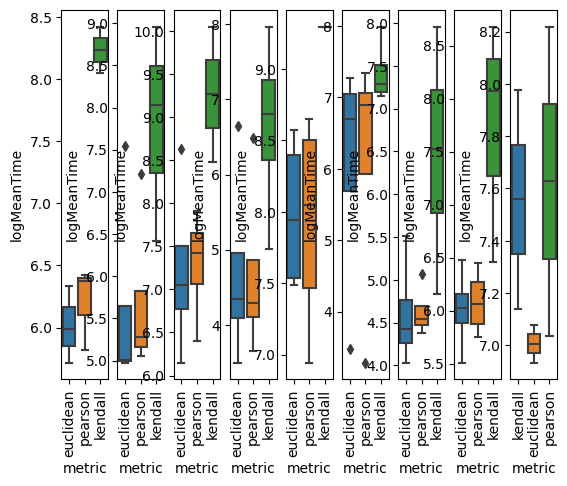

In [14]:
unF = df.DataFile.unique()
print(unF)
df1 = df[df['DataFile']==unF[0]]
df2 = df[df['DataFile']==unF[1]]
df3 = df[df['DataFile']==unF[2]]
df4 = df[df['DataFile']==unF[3]]
df5 = df[df['DataFile']==unF[4]]
#df6 = df[df['DataFile']==unF[5]]
df7 = df[df['DataFile']==unF[6]]
df8 = df[df['DataFile']==unF[7]]
df9 = df[df['DataFile']==unF[8]]
df10 = df[df['DataFile']==unF[9]]

fig, axes = plt.subplots(nrows=1,ncols=9)
#for name, ax in zip(names, axes.flatten()):
for i in axes:
    i.tick_params(axis='x', rotation=90)
sns.boxplot(data=df1, x="metric", y="logMeanTime",ax=axes[0])
sns.boxplot(data=df2, x="metric", y="logMeanTime",ax=axes[1])
sns.boxplot(data=df3, x="metric", y="logMeanTime",ax=axes[2])
sns.boxplot(data=df4, x="metric", y="logMeanTime",ax=axes[3])
sns.boxplot(data=df5, x="metric", y="logMeanTime",ax=axes[4])
#sns.boxplot(data=df6, x="metric", y="logMeanTime",ax=axes[5])
sns.boxplot(data=df7, x="metric", y="logMeanTime",ax=axes[5])
sns.boxplot(data=df8, x="metric", y="logMeanTime",ax=axes[6])
sns.boxplot(data=df9, x="metric", y="logMeanTime",ax=axes[7])
sns.boxplot(data=df10, x="metric", y="logMeanTime",ax=axes[8])



['../DistanceBenchmarking/Generated/100_cells_100000_genes.csv'
 '../DistanceBenchmarking/Generated/100_cells_10000_genes.csv'
 '../DistanceBenchmarking/Generated/1000_cells_10000_genes.csv'
 '../DistanceBenchmarking/Generated/10_cells_10000_genes.csv'
 '../DistanceBenchmarking/Generated/10000_cells_1000_genes.csv'
 '../DistanceBenchmarking/Generated/10000_cells_1000_genes.csv '
 '../DistanceBenchmarking/Generated/10000_cells_10_genes.csv'
 '../DistanceBenchmarking/Generated/100_cells_1000_genes.csv'
 '../DistanceBenchmarking/Generated/1000_cells_1000_genes.csv'
 '../../DistanceBenchmarking/Generated/10000_cells_100_genes.csv'
 '../DistanceBenchmarking/Generated/10000_cells_100_genes.csv']


d:\ai-ml\lib\site-packages\ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if sys.path[0] == "":
d:\ai-ml\lib\site-packages\ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  del sys.path[0]
d:\ai-ml\lib\site-packages\ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-doc

(array([0, 1, 2]),
 [Text(0, 0, '100000'), Text(1, 0, '1000000'), Text(2, 0, '10000000')])

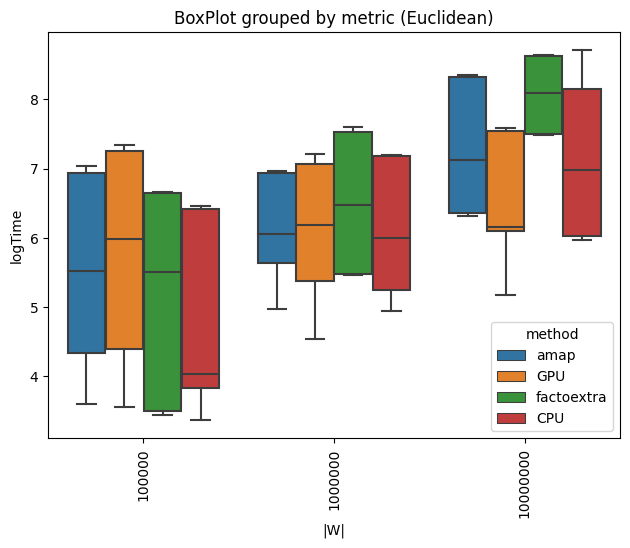

In [21]:
unF = df.DataFile.unique()
print(unF)
df1 = df[df['metric']=='euclidean']
df2 = df[df['metric']=='kendall']
df3 = df[df['metric']=='pearson']
df4 = df[df['metric']=='euclidean']
df5 = df[df['metric']=='kendall']
df6 = df[df['metric']=='pearson']
df7 = df[df['metric']=='euclidean']
df8 = df[df['metric']=='kendall']
df9 = df[df['metric']=='pearson']
df1['logTime'],df2['logTime'],df3['logTime'] = df1['logMeanTime'],df2['logMeanTime'],df3['logMeanTime']
df4['logTime'],df5['logTime'],df6['logTime'] = df4['logMinTime'],df5['logMinTime'],df6['logMinTime']
df7['logTime'],df8['logTime'],df9['logTime'] = df7['logMaxTime'],df8['logMaxTime'],df9['logMaxTime']
df_e = pd.concat([df1,df4,df7])

df_euc = pd.read_csv('box_euc.csv')
#df1.boxplot(column=['logMeanTime'],by=["W","method"])
sns.boxplot(data=df_e,x='|W|',hue="method",y='logTime')
plt.tight_layout()
plt.title('BoxPlot grouped by metric (Euclidean)')
plt.xticks(rotation=90)


In [22]:
df_k = pd.concat([df2,df5,df8])
df_p = pd.concat([df3,df6,df9])

(array([0, 1, 2]),
 [Text(0, 0, '100000'), Text(1, 0, '1000000'), Text(2, 0, '10000000')])

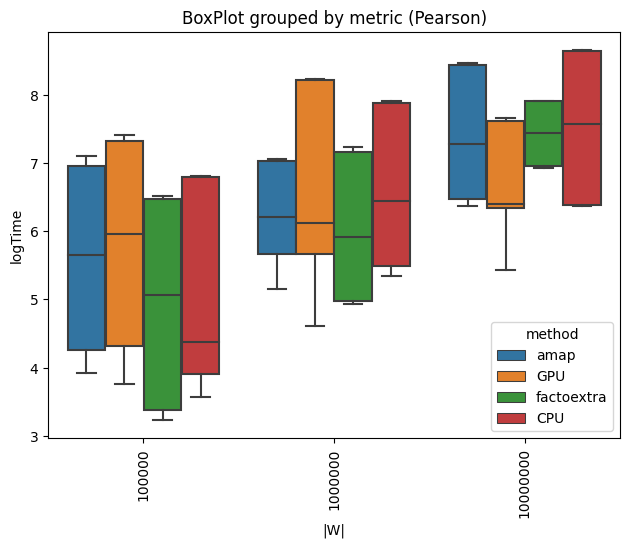

In [23]:
# df2.boxplot(column='logMeanTime',by="W")
# plt.tight_layout()
# plt.title('BoxPlot grouped by metric (Kendall)')
# plt.xticks(rotation=90)

df_pear = pd.read_csv('box_pear.csv')
#df1.boxplot(column=['logMeanTime'],by=["W","method"])
sns.boxplot(data=df_p,x='|W|',hue="method",y='logTime')
plt.tight_layout()
plt.title('BoxPlot grouped by metric (Pearson)')
plt.xticks(rotation=90)

(array([0, 1, 2]),
 [Text(0, 0, '100000'), Text(1, 0, '1000000'), Text(2, 0, '10000000')])

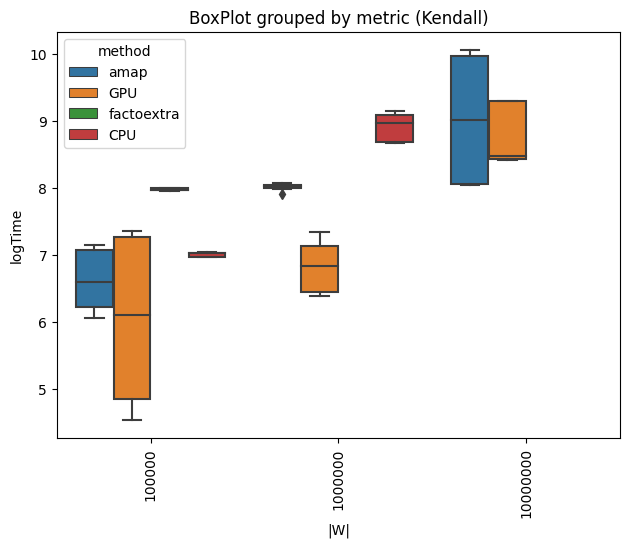

In [24]:
# df1.boxplot(column='logMeanTime',by="W")
# plt.tight_layout()
# plt.title('BoxPlot grouped by metric (Pearson)')
# plt.xticks(rotation=90)

df_kend = pd.read_csv('box_kend.csv')
#df1.boxplot(column=['logMeanTime'],by=["W","method"])
sns.boxplot(data=df_k,x='|W|',hue="method",y='logTime')
plt.tight_layout()
plt.title('BoxPlot grouped by metric (Kendall)')
plt.xticks(rotation=90)

In [19]:
plotData = df[df['IDtag']=="B_CD8_T_count_matrix"]
sns.relplot(x="weight", y="logMinTime",hue='method',
    size="metric", col="metric",
    kind="line",data=plotData)

KeyError: 'IDtag'

In [ ]:
impot numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import math

#log_val  type  metric  mean
df = pd.read_csv('random.csv',delimiter='\t',header=None)
print(df)

def GenerateRandomData():
	pass

def logScaleConvert(data):
  data['logarithm_base10_W'] = np.log10(data[0])
  data['logarithm_base10_M'] = np.log10(data[3])
  return data

log_scaled_df = logScaleConvert(df)
print(log_scaled_df)
#log_scaled_df=log_scaled_df.pivot('logarithm_base10_W')

def plotLogScaleValues(log_data):
  sns.set_style('whitegrid')
  sample_count = np.around(np.logspace(math.log10(5),math.log10(10),6))
  g_results=sns.lineplot(data=log_data['logarithm_base10_W'],dashes=0,markers=['o','o','o'])
  g_results.set(xscale='log')
  g_results.set(xticks=sample_count)
  g_results.set(xticklabels=sample_count)

#plotLogScaleValues(log_scaled_df)
def plotCorrelationMatrix(data):
  f, ax = plt.subplots(figsize=(9, 6))
  sns.heatmap(data, annot=True, fmt="d", linewidths=.5, ax=ax)
#log_scaled_d
log_scaled_d = log_scaled_df['logarithm_base10_W']
#log_scaled_d = log_scaled_df['logarithm_base10_M']

plotCorrelationMatrix(log_scaled_d)

plt.show()

import pandas as pd 
df = pd.read_csv('unt.csv',sep=" ")
import matplotlib.pyplot as mp
import pandas as pd
import seaborn as sb
  
data = df.pivot("metric","method","mean")
dataplot = sb.heatmap(data, cmap="YlGnBu", annot=True)
  
# displaying heatmap
mp.show()
df.to_csv('cleaned.csv')
print(df)